# Heart Disease Death Rates

In this project we are trying to predict cancer and heart disease death rates for each of the 50 US States for 2019. In this notebook, we will focus on heart disease death rates. We want to know which of our many features have the highest impacts on predicting the death rates, and if we can find any interesting and possibly non-traditional relationships that we may not have expected.

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# import geopandas as gpd
import plotly.graph_objects as go
import colorgram
from shapely.geometry import Point, Polygon
# import geoplot
%matplotlib inline
import statsmodels.api as sm
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (AdaBoostRegressor, BaggingRegressor, 
                              RandomForestRegressor, GradientBoostingRegressor)
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                             mean_squared_error, plot_confusion_matrix, 
                             precision_score, r2_score, recall_score,
                             f1_score)
import statsmodels.api as sm
import plotly.express as px
import glob

## Loading in the Data

In [2]:
# importing all datasets and dropping unnecessary and duplicated columns
# code from https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe

path = r'./datasets'
datasets = glob.glob(path + "/*.csv")

datalist = []
for data in datasets:
    dataset = pd.read_csv(data, index_col=None, header=0)
    if 'state' in dataset.columns:
        dataset.rename(columns={'state': 'State'}, inplace=True)
    elif 'STATE' in dataset.columns:
        dataset.rename(columns={'STATE': 'State'}, inplace=True)
    
    if 'State' in dataset.columns:
        if 'District of Columbia' in dataset.loc[:,'State']:
            dataset = dataset[dataset['State'] != 'District of Columbia']
    datalist.append(dataset)
    
df = pd.concat(datalist, axis=1, join='inner', sort=True)
df = df.loc[:,~df.columns.duplicated()]
df.drop(columns=['Unnamed: 0', 'fips', 'StateFIPS', 'Primacy Agency Code'], inplace=True)
# df = pd.read_csv('data_master_kennedy.csv') # code from https://stackoverflow.com/questions/14984119/python-pandas-remove-duplicate-columns

In [3]:
# checking the shape of the df
df.shape

(50, 596)

In [4]:
df

State  personal_health_spend_Y2005  personal_health_spend_Y2006  \
0          Alabama                     5635.737                     6648.616   
1           Alaska                      342.136                      384.365   
2          Arizona                     5773.851                     6811.382   
3         Arkansas                     3176.964                     3752.930   
4       California                    34486.349                    39998.952   
5         Colorado                     3679.335                     4287.357   
6      Connecticut                     4460.572                     5203.213   
7         Delaware                      943.646                     1099.528   
8          Florida                    27377.170                    31942.678   
9          Georgia                     7700.386                     9441.601   
10          Hawaii                     1050.221                     1212.482   
11           Idaho                     1077.066                     1314.919   
12        Illinois                    12919.818                    15177.149   
13         Indiana                     6711.576                     7859.885   
14            Iowa                     2925.963                     3498.197   
15          Kansas                     2796.361                     3226.405   
16        Kentucky                     4915.620                     5787.124   
17       Louisiana                     5779.466                     6448.429   
18           Maine                     1472.384                     1759.715   
19        Maryland                     6311.528                     7292.877   
20   Massachusetts                     8548.436                     9860.861   
21        Michigan                    12152.984                    14099.144   
22       Minnesota                     5000.063                     5855.853   
23     Mississippi                     3442.336                     4036.553   
24        Missouri                     6937.644                     8174.936   
25         Montana                      871.365                     1008.743   
26        Nebraska                     1859.031                     2180.900   
27          Nevada                     2274.246                     2590.857   
28   New Hampshire                     1213.065                     1447.255   
29      New Jersey                    10225.485                    12104.230   
30      New Mexico                     1501.647                     1812.536   
31        New York                    24509.506                    27889.448   
32  North Carolina                     9510.352                    11400.786   
33    North Dakota                      739.457                      831.274   
34            Ohio                    13665.868                    15754.979   
35        Oklahoma                     4003.701                     4799.190   
36          Oregon                     3330.390                     3922.893   
37    Pennsylvania                    17205.867                    20004.516   
38    Rhode Island                     1289.100                     1511.530   
39  South Carolina                     4558.341                     5472.523   
40    South Dakota                      808.660                      943.596   
41       Tennessee                     7393.238                     8986.788   
42           Texas                    22964.664                    27064.007   
43            Utah                     1591.527                     1885.171   
44         Vermont                      549.738                      678.231   
45        Virginia                     6409.362                     7535.644   
46      Washington                     5358.504                     6294.097   
47   West Virginia                     2256.975                     2678.074   
48       Wisconsin                     5333.633                     6281.371   
49         Wy

## EDA

In [5]:
# checking for missing values
df.isna().sum().sort_values()

State                              0
PCT_CACFP17                        0
PCT_OBESE_ADULTS20                 0
PCT_OBESE_ADULTS14                 0
2019_cancer_death_rate             0
                                  ..
2011_Days Ozone                    0
2012_Days Ozone                    0
2006_Days Ozone                    0
other_prof_services_spend_Y2009    0
averageAnnualSunlight(kj/m^2)      2
Length: 596, dtype: int64

In [6]:
# looking into the only 2 missing values
df['averageAnnualSunlight(kj/m^2)']

0     5755.0
1     5642.0
2     5296.0
3     5137.0
4     5050.0
5     4960.0
6     4912.0
7     4890.0
8     4887.0
9     4859.0
10    4725.0
11    4724.0
12    4693.0
13    4685.0
14    4661.0
15    4660.0
16    4624.0
17    4545.0
18    4486.0
19    4471.0
20    4466.0
21    4383.0
22    4380.0
23    4354.0
24    4332.0
25    4331.0
26    4318.0
27    4267.0
28    4251.0
29    4232.0
30    4146.0
31    4139.0
32    4056.0
33    4023.0
34    4018.0
35    3989.0
36    3988.0
37    3968.0
38    3944.0
39    3939.0
40    3925.0
41    3904.0
42    3891.0
43    3847.0
44    3830.0
45    3826.0
46    3815.0
47    3467.0
48       NaN
49       NaN
Name: averageAnnualSunlight(kj/m^2), dtype: float64

In [7]:
# filling missing values with 0 since we can't find the correct data
df.fillna(0, inplace=True)

In [8]:
# df_features = pd.get_dummies(df, columns=['State'], drop_first=True)

In [9]:
# listing columns to see all of them
list(df.columns)

['State',
 'personal_health_spend_Y2005',
 'personal_health_spend_Y2006',
 'personal_health_spend_Y2007',
 'personal_health_spend_Y2008',
 'personal_health_spend_Y2009',
 'state_abrv',
 'cancer_incidence_rate_age_adj',
 'cancer_incidence_ranking_HighToLow',
 '2016_2011_PC_FFRPTH',
 '2016_2011_PC_FSRPTH',
 'home_care_spend_Y2005',
 'home_care_spend_Y2006',
 'home_care_spend_Y2007',
 'home_care_spend_Y2008',
 'home_care_spend_Y2009',
 '2015_2017_to_2012_2014_PC_FOODINSEC',
 '2015_2017_to_2012_2014_PC_VLFOODSEC',
 '2005_Good Days',
 '2006_Good Days',
 '2007_Good Days',
 '2008_Good Days',
 '2009_Good Days',
 '2010_Good Days',
 '2011_Good Days',
 '2012_Good Days',
 '2013_Good Days',
 '2014_Good Days',
 '2015_Good Days',
 '2016_Good Days',
 '2017_Good Days',
 '2018_Good Days',
 '2019_Good Days',
 '2020_Good Days',
 '2005_Moderate Days',
 '2006_Moderate Days',
 '2007_Moderate Days',
 '2008_Moderate Days',
 '2009_Moderate Days',
 '2010_Moderate Days',
 '2011_Moderate Days',
 '2012_Moderate Day

In [10]:
# saving cleaned dataframe as data master
df.to_csv('data_master.csv')

## Visualizations

In [11]:
# creating a state heatmap function

def statemap(data, column, title, palette):
    fig = go.Figure(data=go.Choropleth(
                    locations=data['state_abrv'], # Spatial coordinates
                    z = data[column].astype(float), # Data to be color-coded
                    locationmode = 'USA-states', # set of locations match entries in `locations`
                    colorscale = palette

                ))

    fig.update_layout(
        title_text = title,
        geo_scope='usa', # limit map scope to USA
    )
    fig.write_image(f"./charts/{title}.png")
    return fig.show()

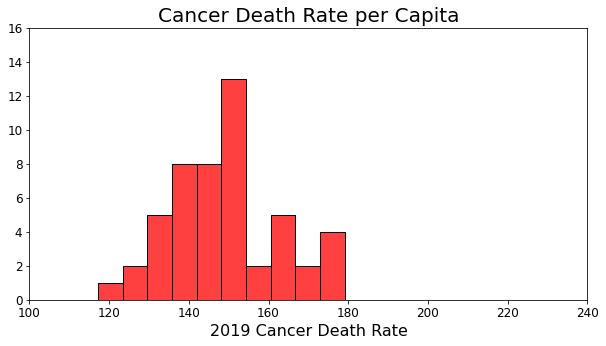

In [12]:
# histogram of our target columns

plt.figure(figsize=(10,5))
sns.histplot(x=df['2019_cancer_death_rate'], bins=10, color='red')
plt.xlim(100, 240)
plt.ylim(0, 16)
plt.xticks(size=12)
plt.yticks(size=12)
plt.title('Cancer Death Rate per Capita', size=20)
plt.xlabel('2019 Cancer Death Rate', size=16)
plt.ylabel('Count', size=12).set_visible(False)
plt.savefig('charts/cancer_histogram.png', bbox_inches='tight', facecolor='w', edgecolor='w');

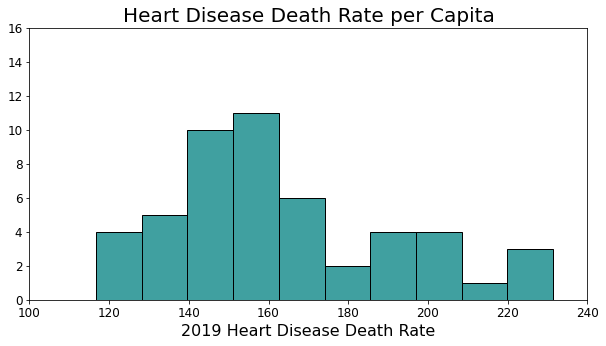

In [13]:
# histogram of our target columns

plt.figure(figsize=(10,5))
sns.histplot(x=df['2019 heart_disease_death_rate'], bins=10, color='teal')
plt.xlim(100, 240)
plt.ylim(0, 16)
plt.xticks(size=12)
plt.yticks(size=12)
plt.title('Heart Disease Death Rate per Capita', size=20)
plt.xlabel('2019 Heart Disease Death Rate', size=16)
plt.ylabel('Count', size=12).set_visible(False)
plt.savefig('charts/HD_histogram.png', bbox_inches='tight', facecolor='w', edgecolor='w');

In [14]:
# creating df's of mean of each year for our targets Heart Disease Death Rate and Cancer Death Rate

HD_means = df[['2019 heart_disease_death_rate',
              '2018 heart_disease_death_rate',
              '2017 heart_disease_death_rate',
              '2016 heart_disease_death_rate',
              '2015 heart_disease_death_rate',
              '2014 heart_disease_death_rate']].mean()
HD_mean = pd.DataFrame(HD_means, columns=['Mean'])
HD_mean

cancer_means = df[['2019_cancer_death_rate',
                     '2018_cancer_death_rate',
                     '2017_cancer_death_rate',
                     '2016_cancer_death_rate',
                     '2015_cancer_death_rate',
                     '2014_cancer_death_rate']].mean()
cancer_mean = pd.DataFrame(cancer_means, columns=['Mean'])
cancer_mean


HD_state_mean_year = df[['State', 
                     '2019 heart_disease_death_rate',
                     '2018 heart_disease_death_rate',
                     '2017 heart_disease_death_rate',
                     '2016 heart_disease_death_rate',
                     '2015 heart_disease_death_rate',
                     '2014 heart_disease_death_rate']]

# rolling them all up to see the 5-year-mean of each state to compare with the incidence rates

cancer_state_mean_year = df[['State',
                         '2019_cancer_death_rate',
                         '2018_cancer_death_rate',
                         '2017_cancer_death_rate',
                         '2016_cancer_death_rate',
                         '2015_cancer_death_rate',
                         '2014_cancer_death_rate']]
cancer_state_mean = pd.DataFrame(df[['state_abrv', 'State']], columns=['state_abrv', 'State'])
cancer_state_mean['5_year_mean'] = cancer_state_mean_year.mean(axis=1)
cancer_state_mean

<ipython-input-14-8acbfa644f5b>:40: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cancer_state_mean['5_year_mean'] = cancer_state_mean_year.mean(axis=1)


state_abrv           State  5_year_mean
0          AL         Alabama   171.400000
1          AK          Alaska   151.716667
2          AZ         Arizona   136.600000
3          AR        Arkansas   175.900000
4          CA      California   138.316667
5          CO        Colorado   131.983333
6          CT     Connecticut   140.550000
7          DE        Delaware   162.566667
8          FL         Florida   146.183333
9          GA         Georgia   157.900000
10         HI          Hawaii   130.566667
11         ID           Idaho   150.116667
12         IL        Illinois   160.550000
13         IN         Indiana   171.266667
14         IA            Iowa   159.016667
15         KS          Kansas   159.566667
16         KY        Kentucky   188.700000
17         LA       Louisiana   175.033333
18         ME           Maine   169.050000
19         MD        Maryland   153.166667
20         MA   Massachusetts   148.433333
21         MI        Michigan   164.666667
22         MN       Minnesota   147.716667
23         MS     Mississippi   185.183333
24         MO        Missouri   168.383333
25         MT         Montana   148.883333
26         NE        Nebraska   153.583333
27         NV          Nevada   154.966667
28         NH   New Hampshire   155.066667
29         NJ      New Jersey   146.500000
30         NM      New Mexico   138.516667
31         NY        New York   143.333333
32         NC  North Carolina   159.816667
33         ND    North Dakota   146.066667
34         OH            Ohio   170.950000
35         OK        Oklahoma   178.400000
36         OR          Oregon   154.350000
37         PA    Pennsylvania   162.100000
38         RI    Rhode Island   157.916667
39         SC  South Carolina   163.283333
40         SD    South Dakota   154.933333
41         TN       Tennessee   175.500000
42         TX           Texas   146.900000
43         UT            Utah   122.083333
44         VT         Vermont   160.416667
45         VA        Virginia   153.983333
46         WA      Washington   149.983333
47         WV   West Virginia   183.600000
48         WI       Wisconsin   155.566667
49         WY         Wyoming   139.433333

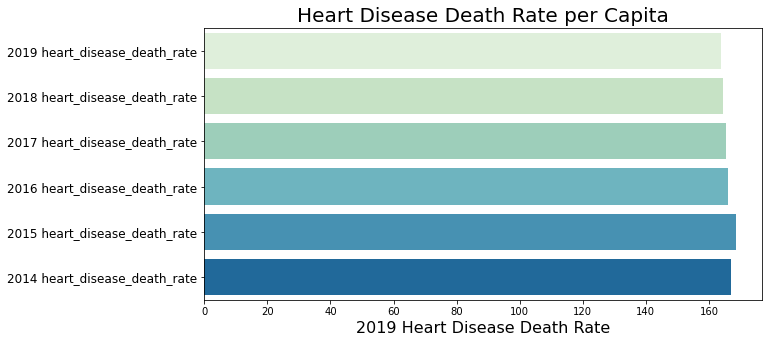

In [15]:
# bar graph of our target 'Heart Diseas Death Rate' by year to see change year-over-year

plt.figure(figsize=(10,5))
sns.barplot(data=HD_mean, x='Mean', y=HD_mean.index, palette='GnBu')
# plt.xlim(100, 240)
# plt.ylim(0, 16)
plt.yticks(size=12)
plt.title('Heart Disease Death Rate per Capita', size=20)
plt.xlabel('2019 Heart Disease Death Rate', size=16)
plt.ylabel('Count', size=12).set_visible(False)
plt.savefig('charts/HD_histogram.png', bbox_inches='tight', facecolor='w', edgecolor='w');

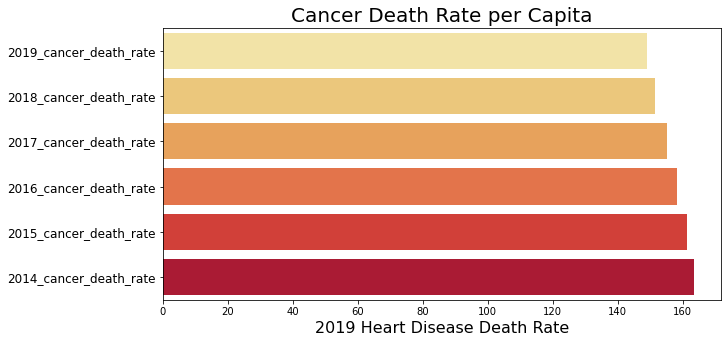

In [16]:
# bar graph of our target 'Cancer Death Rate' by year to see change year-over-year

plt.figure(figsize=(10,5))
sns.barplot(data=cancer_mean, x='Mean', y=cancer_mean.index, palette='YlOrRd')
# plt.xlim(100, 240)
# plt.ylim(0, 16)
plt.yticks(size=12)
plt.title('Cancer Death Rate per Capita', size=20)
plt.xlabel('2019 Heart Disease Death Rate', size=16)
plt.ylabel('Count', size=12).set_visible(False)
plt.savefig('charts/HD_histogram.png', bbox_inches='tight', facecolor='w', edgecolor='w');

### Analysis:

Year-over-year rates of heart disease and cancer death rates are trending downwards.

In [17]:
# State heatmaps of cancer incidence rate by state compared to cancer death rate by state

statemap(df, 'cancer_incidence_rate_age_adj', 'Cancer Incidence Rate by State', 'OrRd');
statemap(cancer_state_mean, '5_year_mean', 'Cancer Death Rate by State', 'OrRd');

### Analysis:

The death rates are not parallel. Some of the states that have higher death rates have lower incidence rates and vice-versa. It's interesting that the East and South seem to have higher death rates overall than the west and Midwest.

In [18]:
# list of death rates to remove from our df in order to make it more difficult for our model 
# and also to focus more on the other features

death_rate_list = ['state_abrv',
                     '2019_cancer_death_rate',
                     '2018_cancer_death_rate',
                     '2017_cancer_death_rate',
                     '2016_cancer_death_rate',
                     '2015_cancer_death_rate',
                     '2014_cancer_death_rate',
                     '2018 heart_disease_death_rate',
                     '2017 heart_disease_death_rate',
                     '2016 heart_disease_death_rate',
                     '2015 heart_disease_death_rate',
                     '2014 heart_disease_death_rate',
                     '2019_CANCER_DEATH_RATE', 
                     '2019_HEART_DISEASE_DEATH_RATE',
                     '2019_2018_PC_CANCER_DEATH_RATE', 
                     '2018_2017_PC_CANCER_DEATH_RATE',
                     '2017_2016_PC_CANCER_DEATH_RATE', 
                     '2016_2015_PC_CANCER_DEATH_RATE',
                     '2015_2014_PC_CANCER_DEATH_RATE', 
                     '2019_2018_PC_HEART_DISEASE_DEATH_RATE',
                     '2018_2017_PC_HEART_DISEASE_DEATH_RATE', 
                     '2017_2016_PC_HEART_DISEASE_DEATH_RATE',
                     '2016_2015_PC_HEART_DISEASE_DEATH_RATE', 
                     '2015_2014_PC_HEART_DISEASE_DEATH_RATE']

df[death_rate_list].head()

state_abrv  2019_cancer_death_rate  2018_cancer_death_rate  \
0         AL                   160.8                   170.4   
1         AK                   146.9                   141.5   
2         AZ                   131.1                   131.9   
3         AR                   165.7                   168.8   
4         CA                   131.6                   135.0   

   2017_cancer_death_rate  2016_cancer_death_rate  2015_cancer_death_rate  \
0                   170.0                   174.0                   175.6   
1                   139.2                   158.7                   159.8   
2                   135.8                   136.8                   141.3   
3                   173.6                   178.8                   185.4   
4                   136.7                   139.7                   142.8   

   2014_cancer_death_rate  2018 heart_disease_death_rate  \
0                   177.6                          224.7   
1                   164.2                          129.7   
2                   142.7                          136.4   
3                   183.1                          217.4   
4                   144.1                          139.7   

   2017 heart_disease_death_rate  2016 heart_disease_death_rate  ...  \
0                          223.2                          222.5  ...   
1                          135.0                          141.0  ...   
2                          141.9                          138.9  ...   
3                          223.8                          223.7  ...   
4                          142.9                          143.1  ...   

   2019_2018_PC_CANCER_DEATH_RATE  2018_2017_PC_CANCER_DEATH_RATE  \
0                       -0.056338                        0.002353   
1                        0.038163                        0.016523   
2                       -0.006065                       -0.028719   
3                       -0.018365                       -0.027650   
4                       -0.025185                       -0.012436   

   2017_2016_PC_CANCER_DEATH_RATE  2016_2015_PC_CANCER_DEATH_RATE  \
0                       -0.022989                       -0.009112   
1                       -0.122873                       -0.006884   
2                       -0.007310                       -0.031847   
3                       -0.029083                       -0.035599   
4                       -0.021475                       -0.021709   

   2015_2014_PC_CANCER_DEATH_RATE  2019_2018_PC_HEART_DISEASE_DEATH_RATE  \
0                       -0.011261                              -0.022697   
1                       -0.026797                               0.000000   
2                       -0.009811                              -0.017595   
3                        0.012561                               0.041858   
4                       -0.009022                              -0.020043   

   2018_2017_PC_HEART_DISEASE_DEATH_RATE  \
0                               0.006720   
1                              -0.039259   
2                              -0.038760   
3                              -0.028597   
4                              -0.022393   

   2017_2016_PC_HEART_DISEASE_DEATH_RATE  \
0                               0.003146   
1                              -0.042553   
2                               0.021598   
3                               0.000447   
4                              -0.001398   

   2016_2015_PC_HEART_DISEASE_DEATH_RATE  \
0                              -0.031345   
1                              -0.085010   
2                               0.000720   
3                               0.002240   
4                              -0.017170   

   2015_2014_PC_HEART_DISEASE_DEATH_RATE  
0                               0.025446  
1                               0.051160  
2                               0.017595  
3                               0.026207  
4                               0.023910  

[5 rows x 24 column

## Heart Disease - Feature Engineering and Selection

In [19]:
# dropping the above columns

df_hd = df.drop(columns=death_rate_list)

In [20]:
# creating a correlation df

heart_disease_corr = df_hd.corr()['2019 heart_disease_death_rate']

# heart_disease_corr_dict = {}
# for index, corr in heart_disease_corr.items():
#     if corr > 0.3 or corr < -0.3:
#         heart_disease_corr_dict[index] = corr
        
# heart_disease_corr = pd.DataFrame(heart_disease_corr_dict.items(), columns=['Id', 'corr']).set_index('Id')
# heart_disease_corr.sort_values(by='corr', ascending=False)

In [21]:
# droppping the target columns and creating a list of features from the correlation index

heart_disease_corr.drop(index=['2019 heart_disease_death_rate'], inplace=True)
features = list(heart_disease_corr.index)

In [22]:
# creating our X features and y target

X = df[features]
y = df['2019 heart_disease_death_rate']

In [23]:
# Using mutual_info_regression to find dependancy values of '2019 heart_disease_death_rate' and correlated columns
# code inspo from https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/
mutual = mutual_info_regression(X, y)
# creating a df of features and dependancy values and listing only set number of the columns as features
feature_dependancy = pd.DataFrame({'features': X,
                                   'dependancy': mutual}).set_index(X.columns)
feature_dependancy.sort_values(by='dependancy', ascending=False)
feature_dependancy = feature_dependancy[feature_dependancy['dependancy'] >= 0.1].sort_values(by='dependancy', ascending=False)[:23]
features = list(feature_dependancy.index)
features

['2020_high_cholesterol_score',
 'PCT_DIABETES_ADULTS13',
 'PCT_OBESE_ADULTS12',
 '2020_frequent_mental_distress_score',
 'PCT_OBESE_ADULTS14',
 '2019_Days Ozone',
 'PCT_WICWOMEN16',
 '2020_exercise_score',
 '2020_health_status_score',
 '2005_90th Percentile AQI',
 '2016_Days Ozone',
 'PCT_OBESE_ADULTS17',
 'FSRPTH16',
 '2020_high_blood_pressure_score',
 'WIC_PART_2015',
 '2015_2010_PC_LACCESS_SENIORS',
 'Percent Educational Attainment',
 'PCT_WICWOMEN14',
 'WIC_PART_2016',
 'Percent Above Poverty Rate',
 '2020_Days PM2.5',
 '2005_Unhealthy for Sensitive Groups Days',
 'PCT_OBESE_ADULTS20']

In [24]:
# resetting the X as our new mutually dependant features

X = df[features]

In [25]:
# checking the statistical summary of our X features with our y target to see the coeficients and p-values

SM2 = sm.add_constant(X, prepend=True)
results2 = sm.OLS(y, SM2).fit()

results2.summary()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     2019 heart_disease_death_rate   R-squared:                       0.821
Model:                                       OLS   Adj. R-squared:                  0.662
Method:                            Least Squares   F-statistic:                     5.173
Date:                           Sun, 31 Oct 2021   Prob (F-statistic):           5.03e-05
Time:                                   14:45:29   Log-Likelihood:                -195.30
No. Observations:                             50   AIC:                             438.6
Df Residuals:                                 26   BIC:                             484.5
Df Model:                                     23                                         
Covariance Type:                       nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                      121.1531    209.196      0.579      0.567    -308.854     551.161
2020_high_cholesterol_score                  3.3654      6.546      0.514      0.612     -10.090      16.820
PCT_DIABETES_ADULTS13                        0.5675      3.993      0.142      0.888      -7.639       8.774
PCT_OBESE_ADULTS12                           0.9201      3.453      0.266      0.792      -6.177       8.017
2020_frequent_mental_distress_score          9.5038      5.540      1.716      0.098      -1.883      20.891
PCT_OBESE_ADULTS14                           2.9547      3.126      0.945      0.353      -3.471       9.381
2019_Days Ozone                             -0.1082      0.164     -0.658      0.516      -0.446       0.230
PCT_WICWOMEN16                              34.9410     46.011      0.759      0.454     -59.636     129.518
2020_exercise_score                         -8.9374      4.669     -1.914      0.067     -18.535       0.661
2020_health_status_score                     4.6075      9.906      0.465      0.646     -15.755      24.970
2005_90th Percentile AQI                     0.2606      0.495      0.527      0.603      -0.756       1.278
2016_Days Ozone                              0.1000      0.136      0.734      0.469      -0.180       0.380
PCT_OBESE_ADULTS17                          -1.5963      2.692     -0.593      0.558      -7.131       3.938
FSRPTH16                                    -3.0384     19.156     -0.159      0.875     -42.413      36.336
2020_high_blood_pressure_score              -0.7062     10.389     -0.068      0.946     -22.062      20.650
WIC_PART_2015                             7444.0874   9145.216      0.814      0.423   -1.14e+04    2.62e+04
2015_2010_PC_LACCESS_SENIORS               -22.3212     50.967     -0.438      0.665    -127.085      82.442
Percent Educational Attainment              -1.2045      1.541     -0.782      0.441      -4.371       1.963
PCT_WICWOMEN14                             -41.0606     38.644     -1.063      0.298    -120.494      38.373
WIC_PART_2016                            -5716.2237   1.01e+04     -0.567      0.576   -2.64e+04     1.5e+04
Percent Above Poverty Rate                   0.0620      2.045      0.030      0.976      -4.141       4.265
2020_Days PM2.5                             -0.0590      0.084     -0.704      0.488      -0.231       0.113
2005_Unhealthy for Sensitive Groups Days    -0.3042      0.962     -0.316      0.754      -2.281       1.673
PCT_OBESE_ADULTS20                          -0.7417      2.956     -0.251      0.804      -6.818       5.335
===================

In [26]:
X.iloc[:,0].name

'2020_high_cholesterol_score'

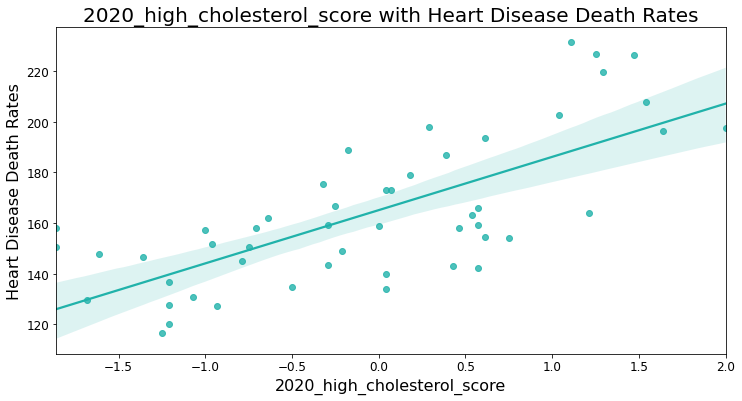

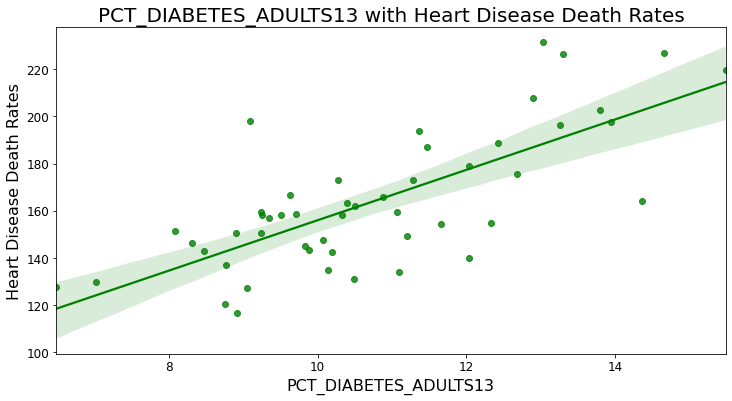

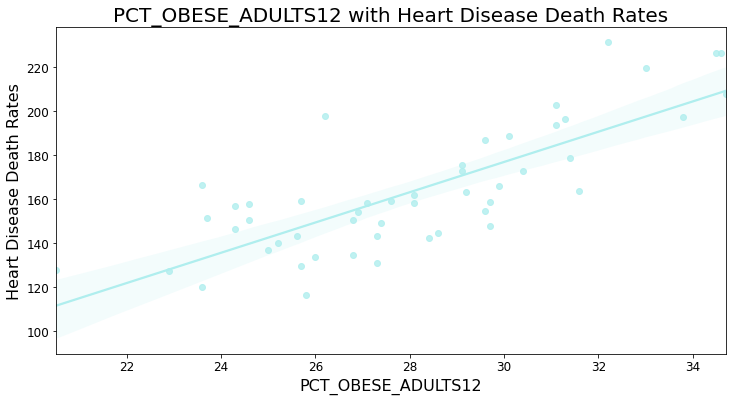

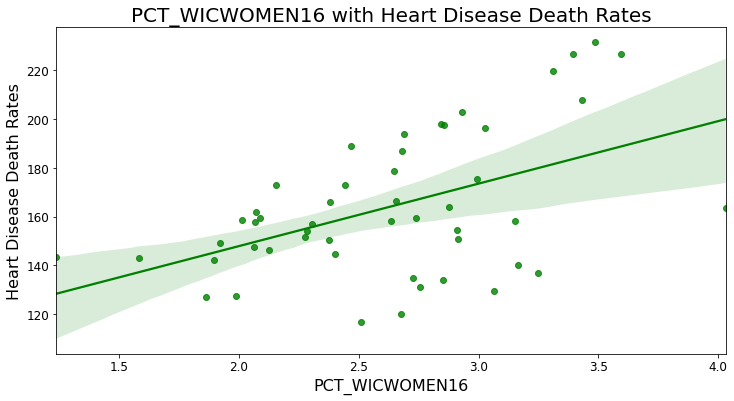

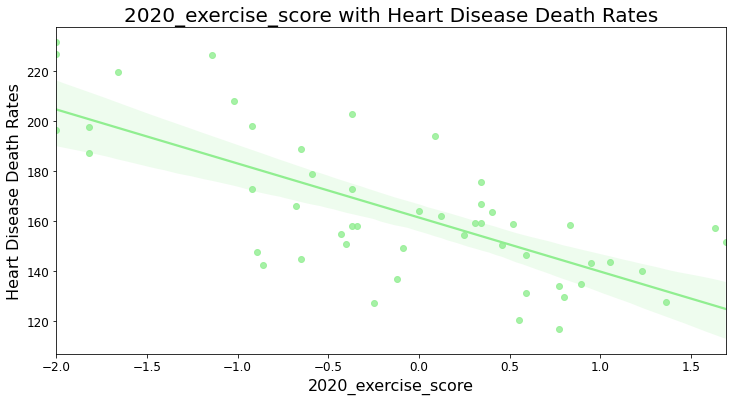

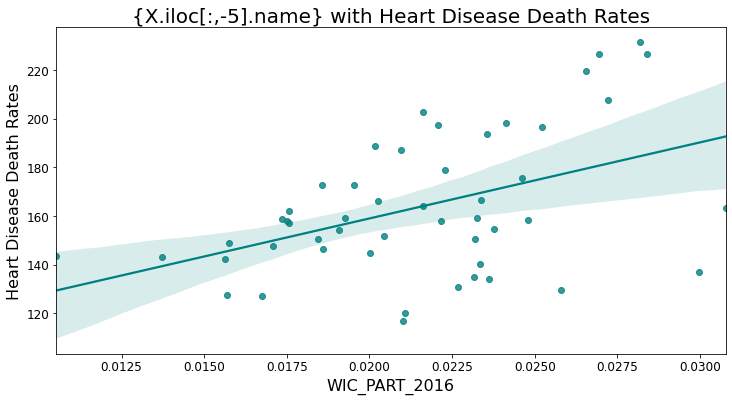

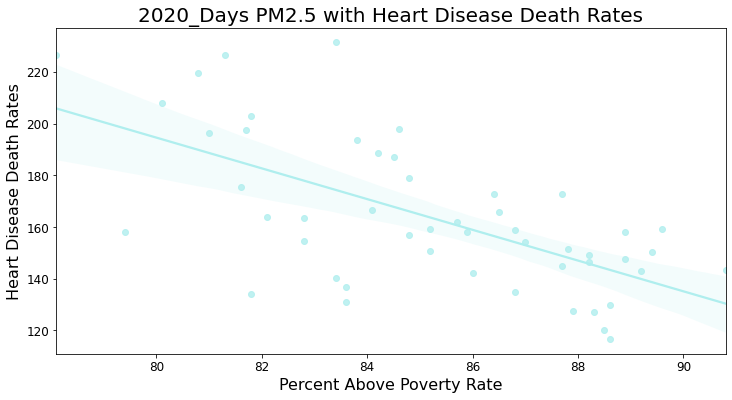

In [27]:
# creating a function that makes a reg plot from our features and target

def reg_plotter(col, color, title, xlabel, ylabel):
    
    plt.figure(figsize=(12,6))

    sns.regplot(x = X[col],
                    y = y,
                    color = color)
    plt.title(title, size=20)
    plt.xlabel(xlabel, size=16)
    plt.ylabel(ylabel, size=16)
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.savefig(f'charts/{title}.png', bbox_inches='tight', facecolor='w', edgecolor='w');

# plotting some of the more highly correlated features

reg_plotter(X.iloc[:,0].name, 'lightseagreen', f'{X.iloc[:,0].name} with Heart Disease Death Rates', 
            X.iloc[:,0].name, 'Heart Disease Death Rates')

reg_plotter(X.iloc[:,1].name, 'green', f'{X.iloc[:,1].name} with Heart Disease Death Rates', 
            X.iloc[:,1].name, 'Heart Disease Death Rates')

reg_plotter(X.iloc[:,2].name, 'paleturquoise', f'{X.iloc[:,2].name} with Heart Disease Death Rates', 
            X.iloc[:,2].name, 'Heart Disease Death Rates')

reg_plotter(X.iloc[:,6].name, 'green', f'{X.iloc[:,6].name} with Heart Disease Death Rates', 
            X.iloc[:,6].name, 'Heart Disease Death Rates')

reg_plotter(X.iloc[:,7].name, 'lightgreen', f'{X.iloc[:,7].name} with Heart Disease Death Rates', 
            X.iloc[:,7].name, 'Heart Disease Death Rates')

reg_plotter(X.iloc[:,-5].name, 'teal', '{X.iloc[:,-5].name} with Heart Disease Death Rates', 
            X.iloc[:,-5].name, 'Heart Disease Death Rates')

reg_plotter(X.iloc[:,-4].name, 'paleturquoise', f'{X.iloc[:,-3].name} with Heart Disease Death Rates', 
            X.iloc[:,-4].name, 'Heart Disease Death Rates')

## Heart Disease - Modeling

In [28]:
# training, testing, spliting

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# scaling the data
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

# transforming using PCA
pca = PCA(n_components=6, random_state=42)
P_train = pca.fit_transform(Z_train)
P_test = pca.transform(Z_test)

# instantiating and fitting a Linear Regression model
ols = LinearRegression()

ols.fit(P_train, y_train)

# printing our scores
print(ols.score(P_train, y_train), ols.score(P_test, y_test))
print((cross_val_score(ols, P_train, y_train, cv=3)).mean())
train_lr_preds = ols.predict(P_train)
test_lr_preds = ols.predict(P_test)
print(f'train rmse: {mean_squared_error(y_train, train_lr_preds)**0.5}, test rmse: {mean_squared_error(y_test, test_lr_preds)**0.5}')

0.7867671576871993 0.45055654995323735
0.6601015066737247
train rmse: 14.51671577346816, test rmse: 12.506243762207557


In [29]:
# transforming our X features to be the same shape as our model is fitted on

s = sc.transform(X)
p = pca.transform(s)
p.shape

(50, 6)

In [30]:
# GridsearchCV model to compare

pipe = Pipeline([
    ('sc', StandardScaler()),
    ('pca', PCA()),
    ('lr', LinearRegression())
])


params = {
    'pca__n_components': range(3, len(features)-1),
    'pca__tol': np.linspace(0.001, 0.4, 6)
}

gs = GridSearchCV(pipe, param_grid=params, cv=3, verbose=1)

gs.fit(X_train, y_train)

# printing our scores 

print(gs.score(X_train, y_train), gs.score(X_test, y_test))
print(gs.best_score_)
train_gs_preds = gs.predict(X_train)
test_gs_preds = gs.predict(X_test)
print(f'train rmse: {mean_squared_error(y_train, train_gs_preds)**0.5}, test rmse: {mean_squared_error(y_test, test_gs_preds)**0.5}')
print(gs.best_params_)

Fitting 3 folds for each of 114 candidates, totalling 342 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.7635464875716923 0.38035703426298684
0.6854450155548918
train rmse: 15.286716471317161, test rmse: 13.281164352547632
{'pca__n_components': 3, 'pca__tol': 0.001}


[Parallel(n_jobs=1)]: Done 342 out of 342 | elapsed:    2.2s finished


### Analysis:

Our first OLS model with PCA did the best out of our models, including the models in our notebook without PCA. We will use the OLS model to make our predictions.

In [31]:
# creating a scatter matrix of our pca columns with total explained variance

total_var = pca.explained_variance_ratio_.sum() * 100

labels = {str(i): f"PC {i+1}" for i in range(pca.n_components)}
labels['color'] = '2019 heart_disease_death_rate'

fig = px.scatter_matrix(
      p,
      color=y,
      dimensions=range(pca.n_components),
      labels=labels,
      title=f'Total Explained Variance: {total_var:.2f}%')


# fig.update_traces(diagonal_visible=False)
fig.show()
fig.write_image("charts/total_explained_var_hd.png");

## Heart Disease Death Rate Predictions

In [32]:
# creating a comparison dataframe of actuals and predictions

hd_preds = ols.predict(p)

hd_comparison = pd.DataFrame(y)
hd_comparison['preds'] = hd_preds
hd_comparison['errors'] = hd_comparison['2019 heart_disease_death_rate'] - hd_comparison['preds']
hd_comparison['state_abrv'] = df['state_abrv']
hd_comparison.index = df['State']

hd_comparison.sort_values(by='errors', ascending=True)

2019 heart_disease_death_rate       preds     errors  \
State                                                                  
Arizona                                 134.0  168.707187 -34.707187   
Maine                                   142.4  171.329423 -28.929423   
Florida                                 140.1  165.227877 -25.127877   
South Carolina                          164.0  187.612575 -23.612575   
North Carolina                          154.7  178.048539 -23.348539   
West Virginia                           197.4  219.512421 -22.112421   
Kentucky                                196.4  212.236211 -15.836211   
Minnesota                               116.7  131.902577 -15.202577   
Oregon                                  131.0  146.054155 -15.054155   
New Mexico                              158.2  171.828468 -13.628468   
Delaware                                154.3  167.678536 -13.378536   
North Dakota                            147.7  157.957758 -10.257758   
California                              136.9  146.856470  -9.956470   
Alaska                                  129.7  139.431310  -9.731310   
Texas                                   163.4  172.294613  -8.894613   
Louisiana                               207.8  215.067735  -7.267735   
Kansas                                  166.0  171.940650  -5.940650   
Hawaii                                  120.3  125.971239  -5.671239   
Massachusetts                           127.2  131.859481  -4.659481   
Washington                              134.8  139.080384  -4.280384   
Nebraska                                144.9  148.392900  -3.492900   
New Hampshire                           143.4  144.683522  -1.283522   
Virginia                                149.1  150.370144  -1.270144   
Wyoming                                 150.4  151.494940  -1.094940   
Indiana                                 178.8  178.667366   0.132634   
Georgia                                 175.5  173.469737   2.030263   
Idaho                                   150.7  148.361275   2.338725   
Wisconsin                               158.8  156.358436   2.441564   
Mississippi                             226.7  223.389020   3.310980   
South Dakota                            158.1  153.333483   4.766517   
Alabama                                 219.6  214.692457   4.907543   
Rhode Island                            159.3  153.415878   5.884122   
Utah                                    146.5  139.576490   6.923510   
Pennsylvania                            172.9  164.874080   8.025920   
Illinois                                162.0  153.212975   8.787025   
Colorado                                127.7  118.589186   9.110814   
Maryland                                159.3  149.726180   9.573820   
Ohio                                    188.8  178.999542   9.800458   
Arkansas                                226.5  216.034585  10.465415   
Connecticut                             143.1  132.303112  10.796888   
Michigan                                193.8  182.004957  11.795043   
Missouri                                187.0  174.678369  12.321631   
Tennessee                               202.8  189.627554  13.172446   
New Jersey                              158.0  144.106229  13.893771   
Iowa                                    172.9  158.011603  14.888397   
Vermont                                 151.6  136.316892  15.283108   
Montana                                 157.1  138.666126  18.433874   
New York                                166.6  147.578546  19.021454   
Nevada                                  198.1  173.988575  24.111425   
Oklahoma                                231.4  204.060225  27.339775   

               state_abrv  
State                      
Arizona                AZ  
Maine                  ME  
Florida                FL  
South Carolina         SC  
North Carolina         NC  
West Virginia          WV  
Kentucky               KY  
Minnesota          

In [33]:
# mean and sum of the errors

print(hd_comparison['errors'].mean())
print(hd_comparison['errors'].sum())

-0.7036398679205675
-35.181993396028375


## Visualizations

In [34]:
# state heatmap or residuals (errors) to better see which states have highest margin of error

statemap(hd_comparison, 'errors', 'Prediction Errors for Heart Disease by State', 'teal')

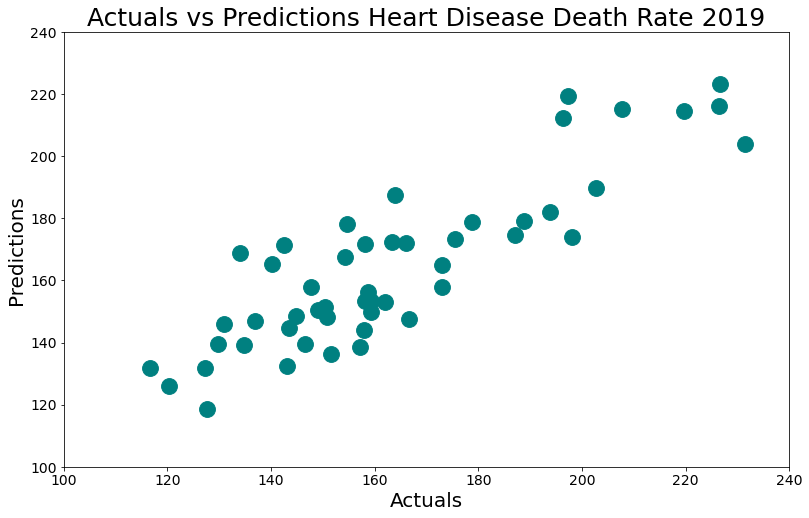

In [35]:
# scatter plot of actuals and predictions
hd_comparison.plot(kind='scatter', x='2019 heart_disease_death_rate', y='preds',
                   color='teal', figsize=(13, 8), s=250)

plt.title('Actuals vs Predictions Heart Disease Death Rate 2019', size=25)
plt.ylabel('Predictions', size=20)
plt.xlabel('Actuals', size=20)
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlim(100, 240)
plt.ylim(100, 240)
plt.savefig('charts/actuals_preds_hd.png', bbox_inches='tight', facecolor='w', edgecolor='w');

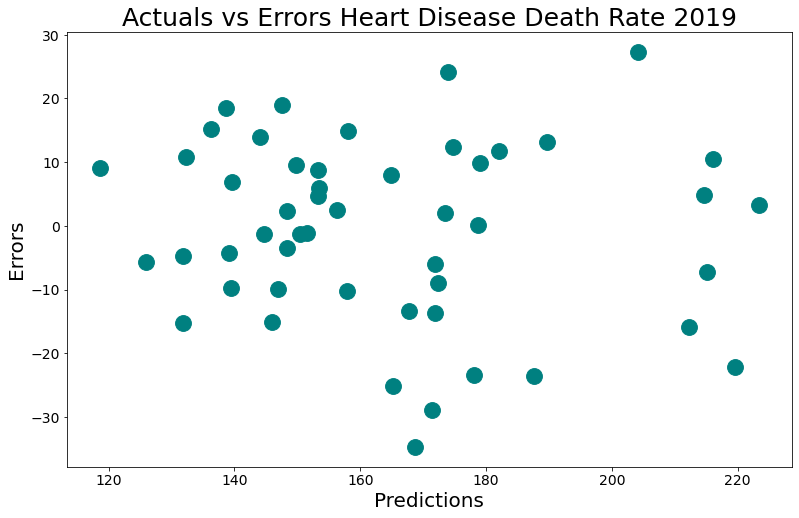

In [36]:
# scatter plot of actuals vs residuals

hd_comparison.plot(kind='scatter', x='preds', y='errors',
                   color='teal', figsize=(13, 8), s=250)

plt.title('Actuals vs Errors Heart Disease Death Rate 2019', size=25)
plt.xlabel('Predictions', size=20)
plt.ylabel('Errors', size=20)
plt.xticks(size=14)
plt.yticks(size=14)
# plt.xlim(100, 240)
# plt.ylim(100, 240)
plt.savefig('charts/actuals_errors_hd.png', bbox_inches='tight', facecolor='w', edgecolor='w');


In [37]:
# checking the X columns to use for scatter plot comparisons

X.columns

Index(['2020_high_cholesterol_score', 'PCT_DIABETES_ADULTS13',
       'PCT_OBESE_ADULTS12', '2020_frequent_mental_distress_score',
       'PCT_OBESE_ADULTS14', '2019_Days Ozone', 'PCT_WICWOMEN16',
       '2020_exercise_score', '2020_health_status_score',
       '2005_90th Percentile AQI', '2016_Days Ozone', 'PCT_OBESE_ADULTS17',
       'FSRPTH16', '2020_high_blood_pressure_score', 'WIC_PART_2015',
       '2015_2010_PC_LACCESS_SENIORS', 'Percent Educational Attainment',
       'PCT_WICWOMEN14', 'WIC_PART_2016', 'Percent Above Poverty Rate',
       '2020_Days PM2.5', '2005_Unhealthy for Sensitive Groups Days',
       'PCT_OBESE_ADULTS20'],
      dtype='object')

In [38]:
# creating a function to make scatter plots from our features and y-target as hue
# code from lesson 9.04
def scatter_chart(df, x, y, c, cmap, title, xlabel, ylabel):
    
    df_plot = df.plot(kind="scatter", x=x, y=y, c=c,
                      cmap=cmap, figsize=(16, 10), s=df[c]*3)
    plt.title(title, size=24)
    plt.ylabel(ylabel, size=21)
    plt.xlabel(xlabel, size=21).set_visible(True)
    df_plot.tick_params(top=False, bottom=True, 
                        left=True, right=False, 
                        labelleft=True, labelbottom=True,
                        which='both', labelsize=16) # https://stackoverflow.com/questions/29988241/python-hide-ticks-but-show-tick-labels
#     plt.colormap.set_label(label=c, fontsize=14)
    plt.savefig(f'charts/{title}.png', bbox_inches='tight', facecolor='w', edgecolor='w')
    return plt.show()

    

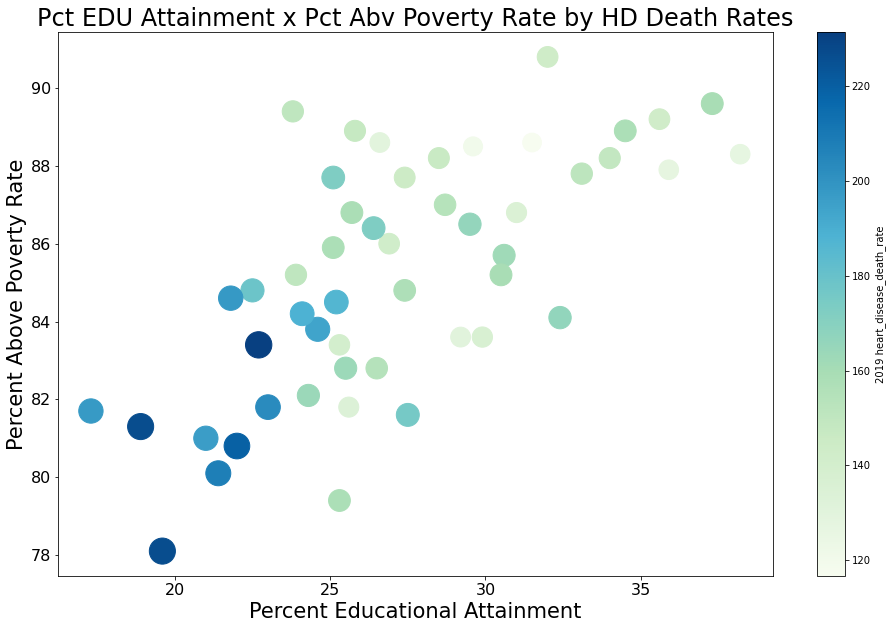

In [39]:
# using the function to create scatter plots

pov_edu = scatter_chart(df, x='Percent Educational Attainment',
                        y='Percent Above Poverty Rate', c='2019 heart_disease_death_rate',
                        cmap='GnBu', title='Pct EDU Attainment x Pct Abv Poverty Rate by HD Death Rates',
                        xlabel='Percent Educational Attainment', ylabel='Percent Above Poverty Rate')
pov_edu

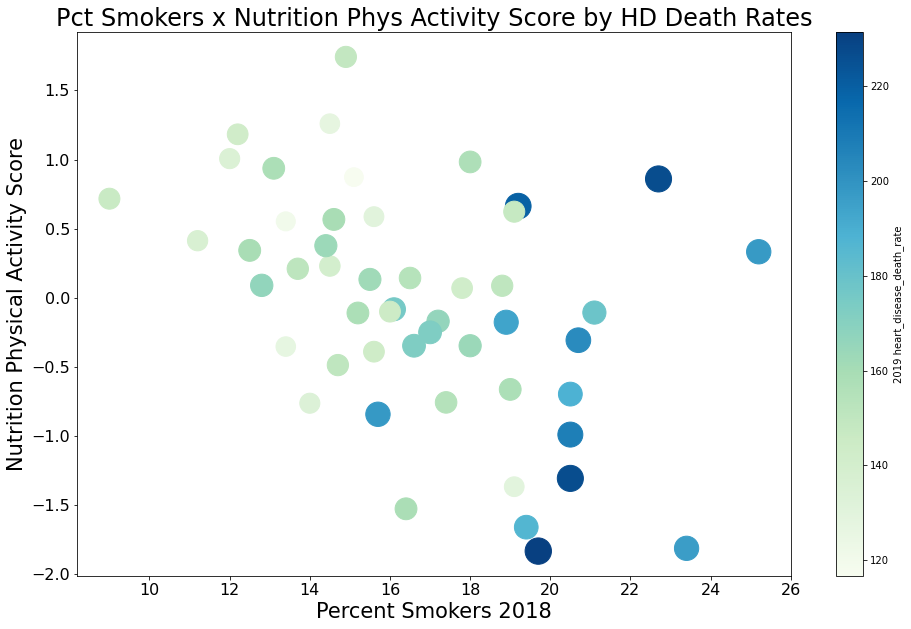

In [40]:
# using the function to create scatter plots
smokers = scatter_chart(df, x='Percent_smokers_2018',
                        y='2020_nutrition_physical_activity_score', c='2019 heart_disease_death_rate',
                        cmap='GnBu', title='Pct Smokers x Nutrition Phys Activity Score by HD Death Rates',
                        xlabel='Percent Smokers 2018', ylabel='Nutrition Physical Activity Score')
smokers

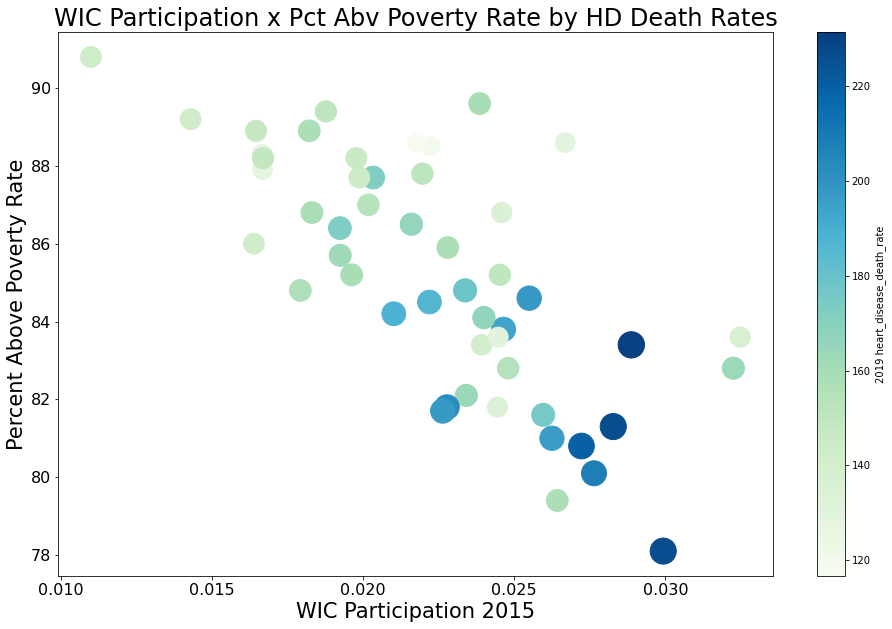

In [41]:
# using the function to create scatter plots
pov_wic = scatter_chart(df, x='WIC_PART_2015',
                        y='Percent Above Poverty Rate', c='2019 heart_disease_death_rate',
                        cmap='GnBu', title='WIC Participation x Pct Abv Poverty Rate by HD Death Rates',
                        xlabel='WIC Participation 2015', ylabel='Percent Above Poverty Rate')
pov_wic

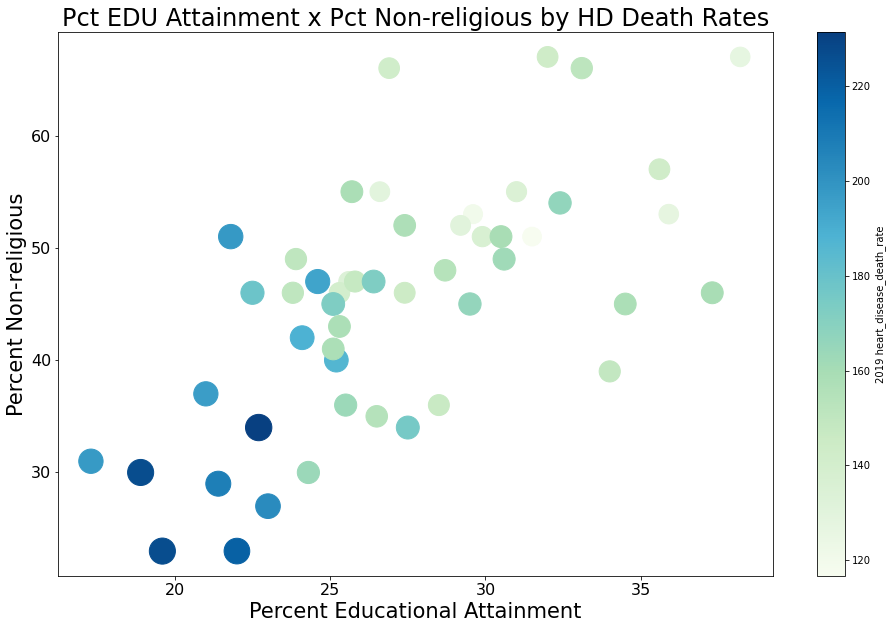

In [42]:
# using the function to create scatter plots
edu_relig = scatter_chart(df, x='Percent Educational Attainment',
                        y='Percent Non-religious', c='2019 heart_disease_death_rate',
                        cmap='GnBu', title='Pct EDU Attainment x Pct Non-religious by HD Death Rates',
                        xlabel='Percent Educational Attainment', ylabel='Percent Non-religious')
edu_relig

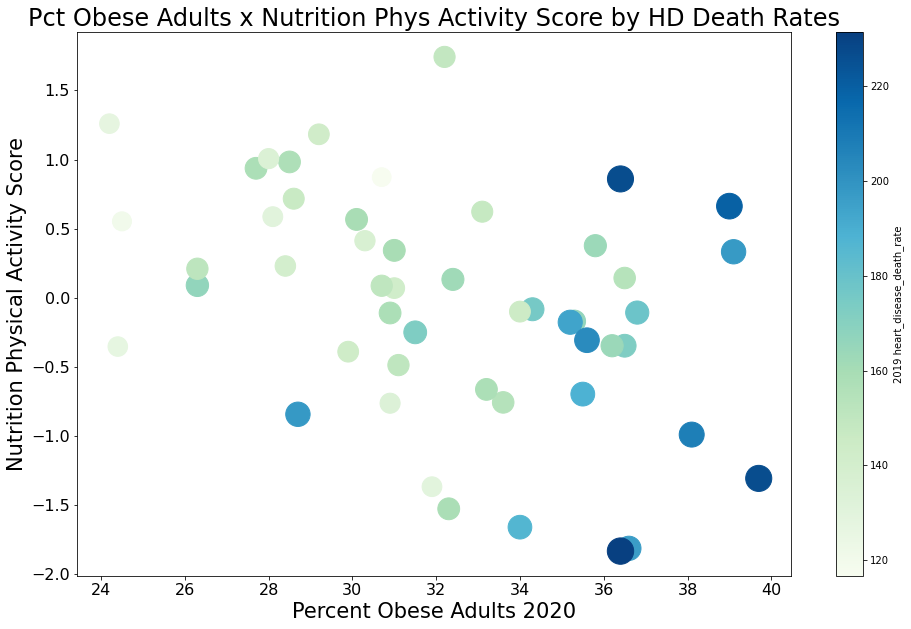

In [43]:
# using the function to create scatter plots
obese_nut_phys = scatter_chart(df, x='PCT_OBESE_ADULTS20',
                        y='2020_nutrition_physical_activity_score', c='2019 heart_disease_death_rate',
                        cmap='GnBu', title='Pct Obese Adults x Nutrition Phys Activity Score by HD Death Rates',
                        xlabel='Percent Obese Adults 2020', ylabel='Nutrition Physical Activity Score')
obese_nut_phys

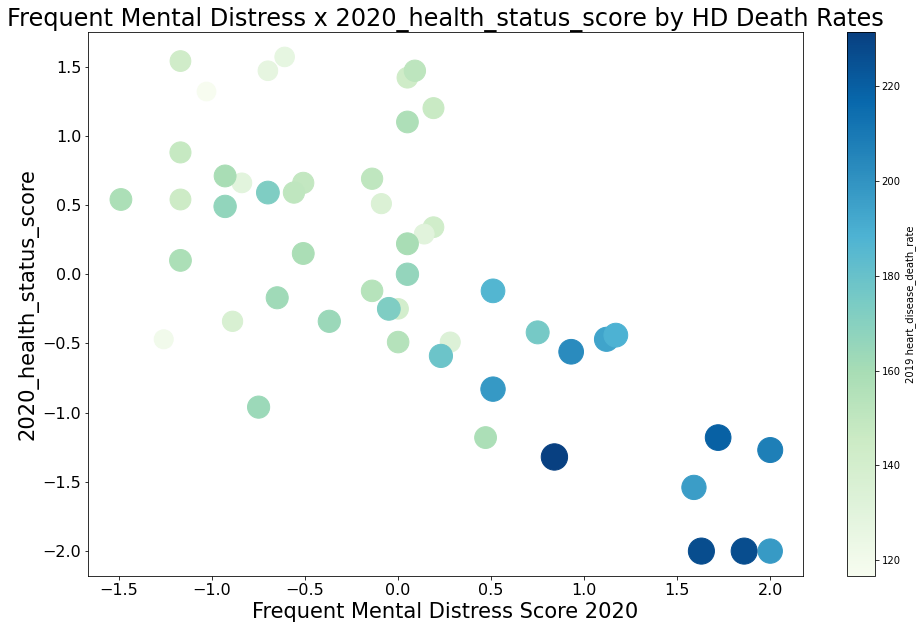

In [44]:
# using the function to create scatter plots
freq_distress_health_status = scatter_chart(df, x='2020_frequent_mental_distress_score',
                        y='2020_health_status_score', c='2019 heart_disease_death_rate',
                        cmap='GnBu', title='Frequent Mental Distress x 2020_health_status_score by HD Death Rates',
                        xlabel='Frequent Mental Distress Score 2020', ylabel='2020_health_status_score')
freq_distress_health_status

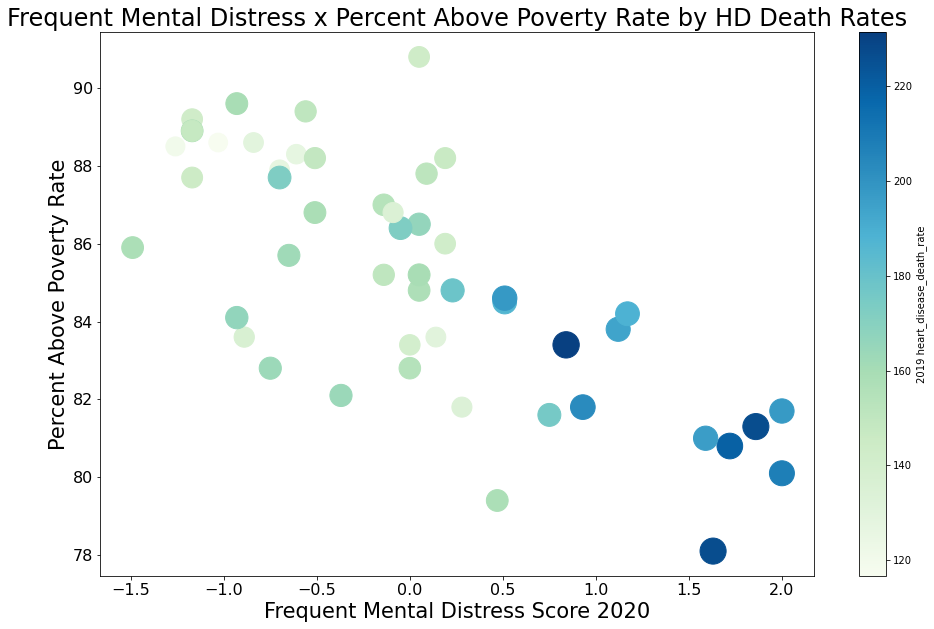

In [45]:
# using the function to create scatter plots
freq_distress_abv_pov = scatter_chart(df, x='2020_frequent_mental_distress_score',
                        y='Percent Above Poverty Rate', c='2019 heart_disease_death_rate',
                        cmap='GnBu', title='Frequent Mental Distress x Percent Above Poverty Rate by HD Death Rates',
                        xlabel='Frequent Mental Distress Score 2020', ylabel='Percent Above Poverty Rate')
freq_distress_abv_pov

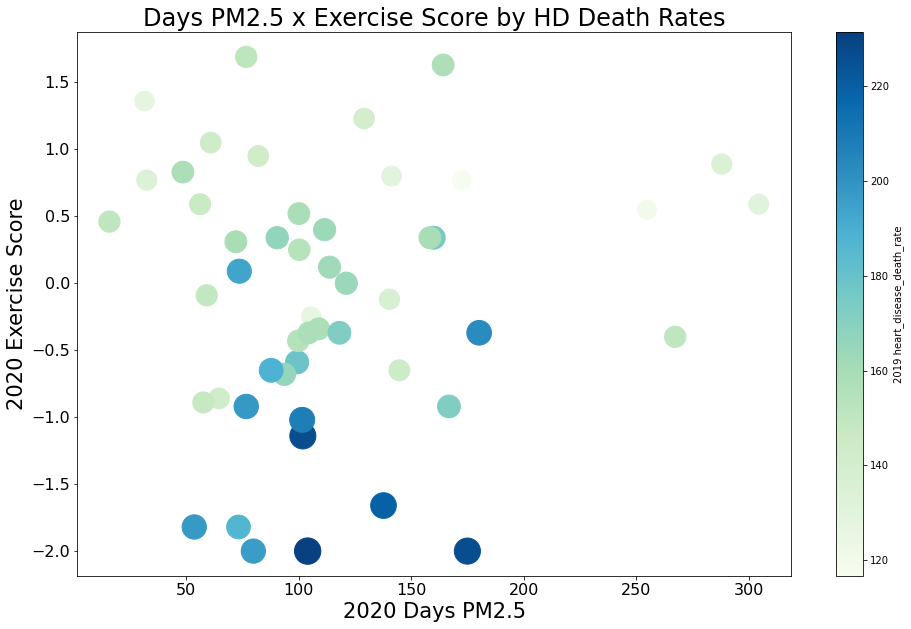

In [46]:
# using the function to create scatter plots
ozone_exercise_scat = scatter_chart(df, x='2020_Days PM2.5',
                        y='2020_exercise_score', c='2019 heart_disease_death_rate',
                        cmap='GnBu', title='Days PM2.5 x Exercise Score by HD Death Rates',
                        xlabel='2020 Days PM2.5', ylabel='2020 Exercise Score')
ozone_exercise_scat

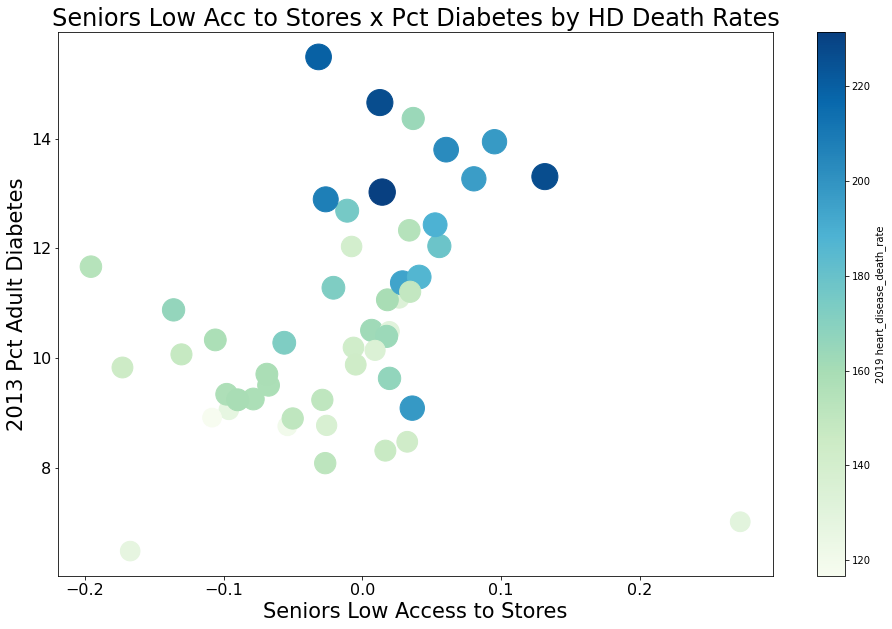

In [47]:
# using the function to create scatter plots
senior_access_store_exercise_scat = scatter_chart(df, x='2015_2010_PC_LACCESS_SENIORS',
                        y='PCT_DIABETES_ADULTS13', c='2019 heart_disease_death_rate',
                        cmap='GnBu', title='Seniors Low Acc to Stores x Pct Diabetes by HD Death Rates',
                        xlabel='Seniors Low Access to Stores', ylabel='2013 Pct Adult Diabetes')
senior_access_store_exercise_scat

## Conclusions & Final Analysis:

Heart disease death rates were much harder to predict without the past years' death rates, and compared with cancer using the same dataset. The best model for predicting the heart disease death rates ended up being Linear Regression with principle component analysis (PCA) engineered features. Our best CV score was 0.685 for our gridsearchCV, but our best testing RMSE was from our first OLS (Linear Regression) model with PCA without the gridsearch or pipeline, which was 12.5. It's a far cry from 0.013 which was the testing RMSE we got in our models with the past years' death rates, but that is to be expected since the death rates were a major predictor factor for our target.

We learned about some interesting relationships that we did not expect to see. One of the most interesting is the 'Drive Alone to Work Score' which has a positive linear relationship with states with higher heart disease death rates. Another is frequent mental health distress, which also has a positive linear relationship with death rates. We also see states with higher percent above the poverty rate, higher education attainment, and higher non-religious rates have lower heart disease death rates. These all show correlation, but not causation, so we don't know exactly what has caused what in our study, but the relationships are interesting nontheless. We also see the features that are typically related to heart disease such as higher obesity and diabetes rates have a predictable relationship with heart disease death rates.

To improve on our models in the future, we could try to add even more data. Some data we could look into adding would be genetics and blood samples with levels of carcinogens. We could also try running these models at the county level, for a more granular look at death rates, that might be even more insightful at the micro level.

From our analysis we can make the following recommendations to the general public:

- Exercise and eat healthy
- Education is important if you can afford it
- Try to avoid stress/mental distress
- Community is important, think about carpooling to work
- Try to avoid unhealthy air days (weather apps have this feature now)
- Check with your doctor for risk factors

We realize there are many factors that are beyond the control of the general public such as poverty, food deserts, and environmental factors but the above are just some things that may help lower risk of death from heart disease.